In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load in the data

In [216]:
streamflow_data = pd.read_csv("data/streamflow_data/Final_Processed_Station_Data_Watershed.csv")
streamflow_data.dropna(inplace=True)
streamflow_data.head(5)

C:\Users\tbwil\AppData\Local\Temp\ipykernel_12704\1023125811.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

,name,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
0,lat,50.93759,49.239,49.50195,55.12986,49.15912,49.36992,49.20763,52.36008,55.42654,...,50.28432,49.24928,50.23847,51.67917,49.14767,49.16981,49.70292,50.21222,50.91261,50.13569
1,lon,-119.65634,-122.57975,-117.26128,-129.35494,-116.45249,-124.98411,-119.99352,-126.00586,-126.69763,...,-118.94704,-119.32139,-119.26689,-127.17917,-122.53187,-118.97506,-119.09247,-119.53861,-122.23931,-126.82006
2,major_watershed,South Thompson River,Fraser River,Lower Kootenay River,Nass River,Lower Kootenay River,Vancouver Island (West) Rivers,Okanagan River,North Coast Rivers,Babine River,...,South Thompson River,Okanagan River,Okanagan River,North Coast Rivers,Fraser River,Kettle River,Kettle River,Okanagan River,Fraser River,Vancouver Island (West) Rivers
3,2011-01-01,21.10065052,3.950658369,0.026633333,0.175258698,0.49568895,12.29111538,1.690907985,-126.00586,15.4966629,...,0.067015878,0.083,0.075272787,99.95522759,0.072746181,1.596026005,0.401,0.04718573,1.238667116,0.176193638
4,2011-01-02,20.69611806,3.74086273,0.0249375,0.163091831,0.485078758,11.49209615,1.755803793,-120.3616256,15.25197908,...,0.067070577,0.081,0.07749122,94.00841842,0.052530297,1.552300933,0.392296896,0.047,1.195453978,0.147495593


In [217]:
station_lats = streamflow_data.iloc[0][1:]
station_lons = streamflow_data.iloc[1][1:]
watersheds = streamflow_data.iloc[2][1:]

# drop the first 3 rows
streamflow_data = streamflow_data.drop([0, 1, 2])
# drop the first column
streamflow_data = streamflow_data.drop(columns=["name"])
streamflow_data = streamflow_data.astype(float)
streamflow_data.head(5)

,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,BAKER CREEK AT QUESNEL,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
3,21.100651,3.950658,0.026633,0.175259,0.495689,12.291115,1.690908,-126.005860,15.496663,0.779153,...,0.067016,0.083,0.075273,99.955228,0.072746,1.596026,0.401000,0.047186,1.238667,0.176194
4,20.696118,3.740863,0.024938,0.163092,0.485079,11.492096,1.755804,-120.361626,15.251979,0.777872,...,0.067071,0.081,0.077491,94.008418,0.052530,1.552301,0.392297,0.047000,1.195454,0.147496
5,20.412194,3.620703,0.023571,0.166408,0.486131,10.892279,1.819793,-114.717391,15.246768,0.772798,...,0.067069,0.079,0.079711,87.546224,0.036934,1.541753,0.383060,0.061246,1.150701,0.136078
6,20.203941,3.528421,0.024729,0.178720,0.498147,10.455154,1.879251,-109.073157,15.616654,0.768037,...,0.067029,0.077,0.082849,82.198203,0.035229,1.570497,0.373180,0.066975,1.107009,0.183736
7,20.193618,5.366124,0.024850,0.188595,0.509200,11.024510,1.930552,-103.428922,16.034901,0.763594,...,0.066954,0.075,0.087453,85.333824,0.458728,1.617611,0.362546,0.063745,1.066981,2.734586


In [218]:
# load in the precipitation and temperature data
rainfall_data = np.load("data/weather_data/rainfall_data.npy").astype(float)
snowfall_data = np.load("data/weather_data/snowfall_data.npy").astype(float)
max_temp_data = np.load("data/weather_data/max_temp_data_interp.npy").astype(float)
min_temp_data = np.load("data/weather_data/min_temp_data_interp.npy").astype(float)

# Split the data into training, validation, and test sets

In [219]:
# define the fractions
train_frac = 7/9
val_frac = 1/9
test_frac = 1/9

assert train_frac + val_frac + test_frac == 1

# define the indices for the train, validation, and test sets
train_idx = int(train_frac * len(streamflow_data))
val_idx = int((train_frac + val_frac) * len(streamflow_data))
n_train = train_idx
n_val = val_idx - train_idx
n_test = len(streamflow_data) - val_idx

assert n_train + n_val + n_test == len(streamflow_data)

# standardize the data based on the training set
rainfall_data = (rainfall_data - np.mean(rainfall_data[:train_idx])) / np.std(rainfall_data[:train_idx])
snowfall_data = (snowfall_data - np.mean(snowfall_data[:train_idx])) / np.std(snowfall_data[:train_idx])
max_temp_data = (max_temp_data - np.mean(max_temp_data[:train_idx])) / np.std(max_temp_data[:train_idx])
min_temp_data = (min_temp_data - np.mean(min_temp_data[:train_idx])) / np.std(min_temp_data[:train_idx])
streamflow_data = (streamflow_data - streamflow_data.iloc[:train_idx].mean()) / streamflow_data.iloc[:train_idx].std()
streamflow_data = streamflow_data.to_numpy()

In [266]:
# define the time window
n_groups = 30
group_size = 1
time_window = n_groups * group_size
n_channels = 4
grid_shape = rainfall_data.shape[1:]
n_stations = streamflow_data.shape[1]

combine_multiple_groups = False
if combine_multiple_groups:
    pts_per_group = 7
    group_sizes = [1,7,14,30]
    n_groups = len(group_sizes) * pts_per_group
    time_window = np.sum(group_sizes) * pts_per_group
    start_idxs = np.cumsum([0] + [pts_per_group * size for size in group_sizes])

# create the training, validation, and test sets
x_intermediate = np.empty(np.shape(rainfall_data) + (4,), dtype='single')
for i, data in enumerate([rainfall_data, snowfall_data, max_temp_data, min_temp_data]):
    x_intermediate[:,:,:,i] = data
x_intermediate = x_intermediate[:,:,:,:n_channels]

def gen_train():
    for i in range(n_train - time_window):
        if combine_multiple_groups:
            xsizes = [x_intermediate[i+start_idxs[j]:i+start_idxs[j+1]].reshape(pts_per_group, *grid_shape, n_channels, group_sizes[j]).mean(axis=-1) for j in range(len(group_sizes))]
            xx = np.concatenate(xsizes, axis=0)
        else:
            xx = tf.convert_to_tensor(x_intermediate[i:i+time_window].reshape(n_groups, *grid_shape, n_channels, group_size).mean(axis=-1))
        yy = streamflow_data[time_window + i,:]
        yield (xx, yy)

def gen_val():
    for i in range(n_val):
        if combine_multiple_groups:
            xsizes = [x_intermediate[i+n_train-time_window+start_idxs[j]:i+n_train-time_window+start_idxs[j+1]].reshape(pts_per_group, *grid_shape, n_channels, group_sizes[j]).mean(axis=-1) for j in range(len(group_sizes))]
            xx = np.concatenate(xsizes, axis=0)
        else:
            xx = tf.convert_to_tensor(x_intermediate[i+n_train-time_window:i+n_train].reshape(n_groups, *grid_shape, n_channels, group_size).mean(axis=-1))
        yy = streamflow_data[val_idx + i,:]
        yield (xx, yy)

def gen_test():
    for i in range(n_test):
        if combine_multiple_groups:
            xsizes = [x_intermediate[i+val_idx-time_window+start_idxs[j]:i+val_idx+start_idxs[j+1]].reshape(pts_per_group, *grid_shape, n_channels, group_sizes[j]).mean(axis=-1) for j in range(len(group_sizes))]
            xx = np.concatenate(xsizes, axis=0)
        else:
            xx = tf.convert_to_tensor(x_intermediate[i+val_idx-time_window:i+val_idx].reshape(n_groups, *grid_shape, n_channels, group_size).mean(axis=-1))
        yy = streamflow_data[val_idx + i,:]
        yield (xx, yy)

# Create a model

In [267]:
def create_model(learning_rate=0.001):
    # Input layer
    cnn_input = layers.Input(shape=(n_groups, *grid_shape, n_channels), name="Weather_Data_Input")
    
    # TimeDistributed CNN
    cnn = layers.TimeDistributed(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))(cnn_input)
    cnn = layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))(cnn)
    cnn = layers.TimeDistributed(layers.MaxPooling2D((2, 2)))(cnn)
    cnn = layers.TimeDistributed(layers.Flatten())(cnn)  # Flatten the grid

    # LSTM for temporal patterns
    lstm = layers.LSTM(32, return_sequences=False)(cnn)

    # Fully connected layers
    dense = layers.Dense(32, activation='relu')(lstm)
    dense = layers.Dropout(0.2)(dense)  # Dropout for regularization
    output = layers.Dense(n_stations, activation='linear', name="Streamflow_Output")(dense)

    # Model definition
    model = models.Model(inputs=cnn_input, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

model = create_model()
model.summary()

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Weather_Data_Input (InputLayer) │ (None, 30, 22, 37, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_279            │ (None, 30, 22, 37, 8)  │           296 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_280            │ (None, 30, 22, 37, 16) │         1,168 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_281            │ (None, 30, 11, 18, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_282            │ (None, 30, 3168)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_84 (LSTM)                  │ (None, 32)             │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Streamflow_Output (Dense)       │ (None, 241)            │         7,953 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,201 (1.60 MB)

 Trainable params: 420,201 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

### Model rationale:
Lighter Convolutions:
* Starting with 8 filters in the first Conv2D reduces computational overhead while still extracting features.

Pooling for Dimensionality Reduction:
* The MaxPooling2D layer halves spatial dimensions, reducing memory and compute needs.

Flatten Instead of Global Pooling:
* Retains more detailed spatial features by flattening instead of directly aggregating with GlobalMaxPooling2D.

Single LSTM Layer:
* A single LSTM with 64 units balances complexity and efficiency.

Dropout Regularization:
* A dropout rate of 0.2 in the dense layers mitigates overfitting without significant computational cost.

Simplified Dense Layers:
* One hidden layer in the Dense block keeps the architecture compact.

# Train and save the model

In [ ]:
batch_size = 8
learning_rate = 0.001
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             mode='min',
                                             verbose=1,
                                             patience=5,
                                             restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.1,
                                                patience=2,
                                                verbose=1,
                                                mode='min')

print(f"Training model with {group_size} day groups and {n_groups} groups")
print(f"Using {n_channels} data channels")
train_dataset = tf.data.Dataset.from_generator(
    gen_train,
    (tf.float16, tf.float16),
    (tf.TensorShape([n_groups, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
).shuffle(n_train).batch(batch_size)

val_dataset = tf.data.Dataset.from_generator(
    gen_val,
    (tf.float16, tf.float16),
    (tf.TensorShape([n_groups, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
).shuffle(n_val).batch(batch_size)

model = create_model(learning_rate)
model.fit(
    train_dataset,
    epochs=40,
    validation_data=val_dataset,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# save the model
if combine_multiple_groups:
    model.save(f"models/test_model_composite_{n_channels}ch.keras")
model.save(f"models/test_model_group_{group_size}x{n_groups}days_{n_channels}ch.keras")

Training model with 1 day groups and 30 groups
Using 4 data channels
Epoch 1/40
    316/Unknown 75s 207ms/step - loss: 0.8168

# Plot the results

In [223]:
def compute_nse(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


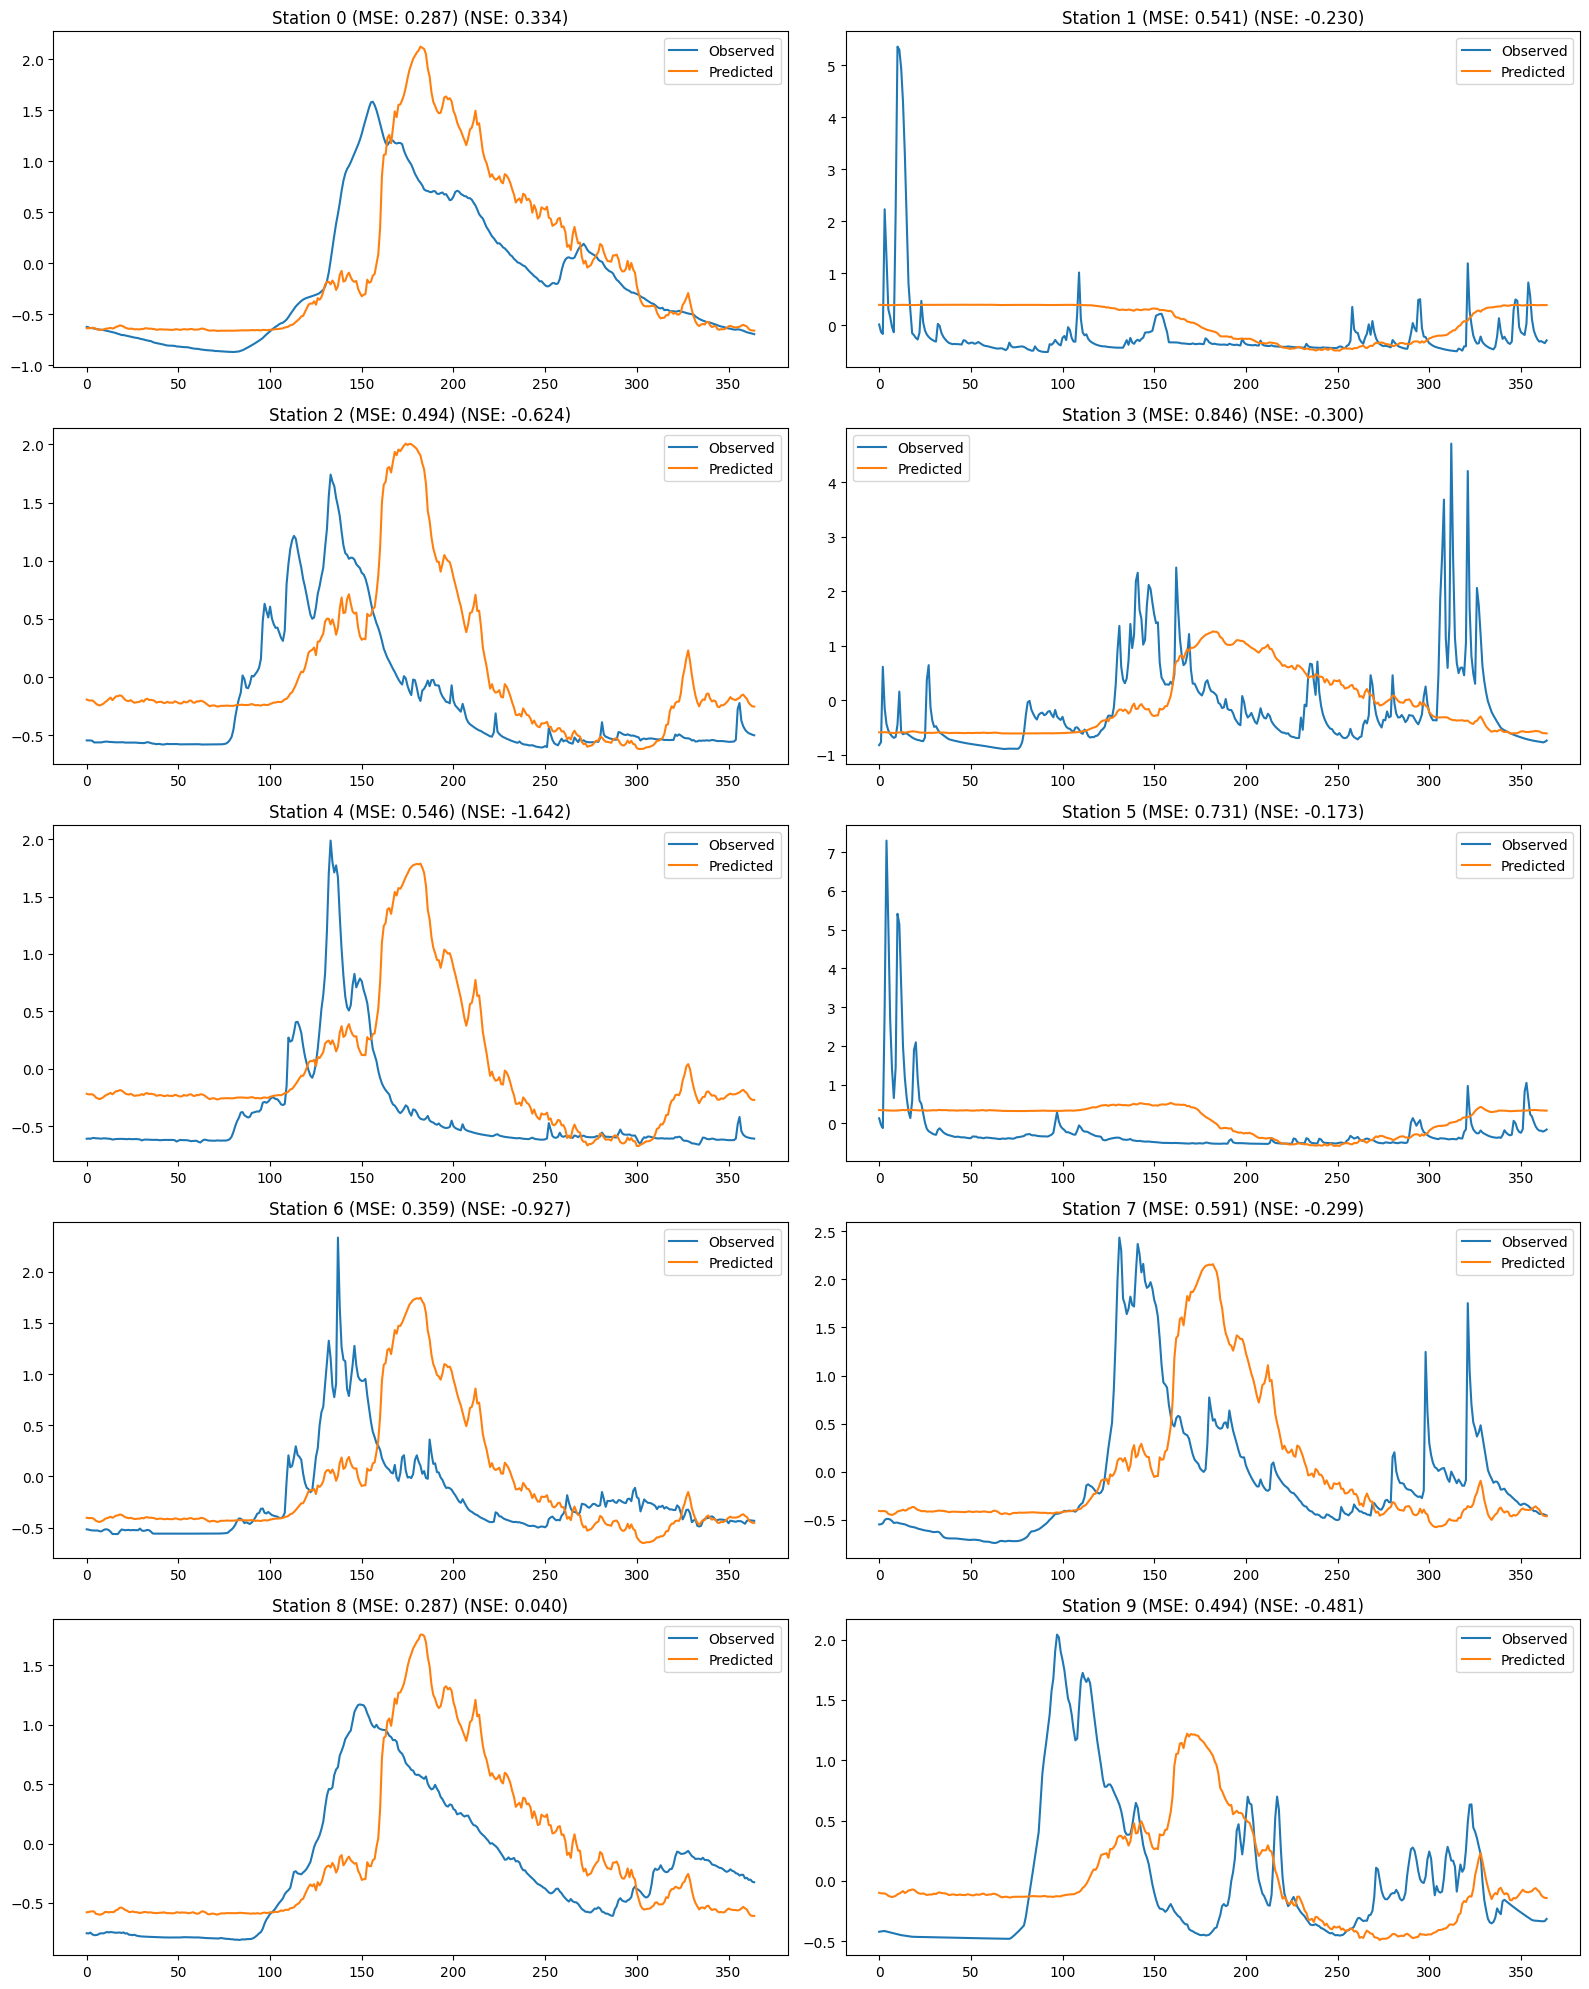

In [253]:
# plot the model predictions for the first 20 stations using subplots
n_plot = 10

n_groups = 28
group_size = 1
time_window = n_groups * group_size
n_channels = 4

val_dataset = tf.data.Dataset.from_generator(
    gen_val,
    (tf.float16, tf.float16),
    (tf.TensorShape([n_groups, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
).batch(batch_size)

if combine_multiple_groups:
    model = tf.keras.models.load_model(f"models/test_model_composite_{n_channels}ch.keras")
else:
    model = tf.keras.models.load_model(f"models/test_model_group_{group_size}x{n_groups}days_{n_channels}ch.keras")

predictions = model.predict(val_dataset)
y_true = np.empty((n_val, n_stations))
for i, (_, y) in enumerate(gen_val()):
    y_true[i] = y

fig, axs = plt.subplots(n_plot // 2, 2, figsize=(16, n_plot * 2))
for i in range(n_plot):
    mse = np.mean((y_true[:, i] - predictions[:, i]) ** 2)
    nse = compute_nse(y_true[:, i], predictions[:, i])
    station = i
    ax = axs[i // 2, i % 2]
    ax.plot(y_true[:, station], label='Observed')
    ax.plot(predictions[:, station], label='Predicted')
    ax.set_title(f"Station {station} (MSE: {mse:.3f}) (NSE: {nse:.3f})")
    ax.legend()
plt.tight_layout()
plt.show()

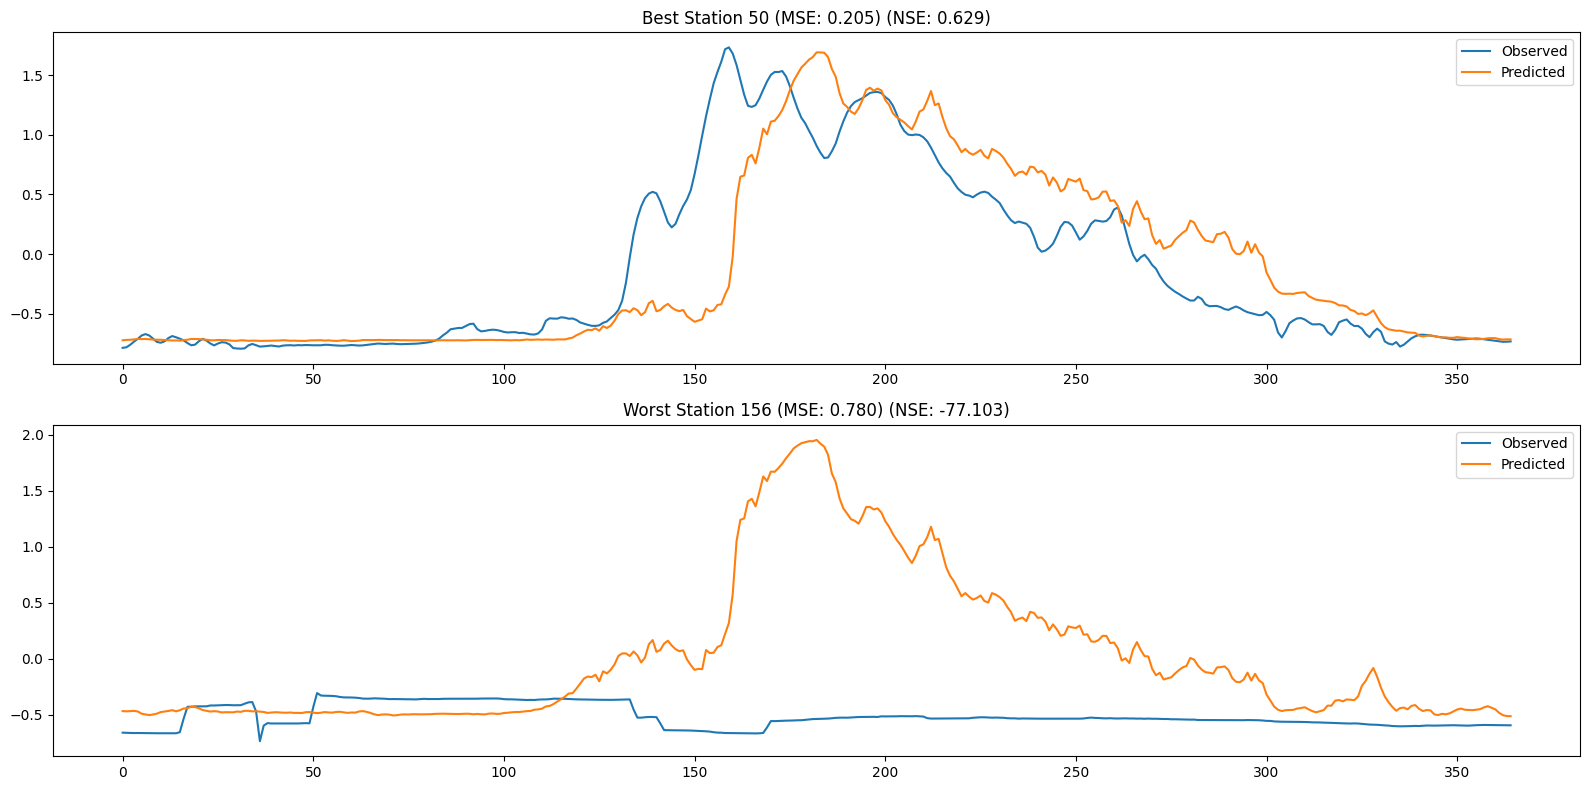

In [254]:
# plot the best and worst predictions by NSE
best_station = np.argmax([compute_nse(y_true[:, i], predictions[:, i]) for i in range(n_stations)])
worst_station = np.argmin([compute_nse(y_true[:, i], predictions[:, i]) for i in range(n_stations)])

# best_station = np.argmin(np.mean((y_true - predictions) ** 2, axis=0))
# worst_station = np.argmax(np.mean((y_true - predictions) ** 2, axis=0))

fig, axs = plt.subplots(2, 1, figsize=(16, 8))
mse = np.mean((y_true[:, best_station] - predictions[:, best_station]) ** 2)
nse = compute_nse(y_true[:, best_station], predictions[:, best_station])
axs[0].plot(y_true[:, best_station], label='Observed')
axs[0].plot(predictions[:, best_station], label='Predicted')
axs[0].set_title(f"Best Station {best_station} (MSE: {mse:.3f}) (NSE: {nse:.3f})")
axs[0].legend()

mse = np.mean((y_true[:, worst_station] - predictions[:, worst_station]) ** 2)
nse = compute_nse(y_true[:, worst_station], predictions[:, worst_station])
axs[1].plot(y_true[:, worst_station], label='Observed')
axs[1].plot(predictions[:, worst_station], label='Predicted')
axs[1].set_title(f"Worst Station {worst_station} (MSE: {mse:.3f}) (NSE: {nse:.3f})")
axs[1].legend()
plt.tight_layout()
plt.show()

# Plot the test model performances

In [257]:
# collect all of the test_model_group files
import os
import re

model_files = [f for f in os.listdir("models") if f.startswith("test_model_group")]

# extract the group size, number of groups, and number of channels from the file name
model_info = []
for model_file in model_files:
    group_size, n_groups, n_channels = [int(s) for s in re.findall(r'\d+', model_file)]
    model_info.append((group_size, n_groups, n_channels))

# load the models and compute the predictions
predictions = []
y_true = []
mean_mse = []
for (group_size, n_groups, n_channels) in model_info:
    time_window = n_groups * group_size
    val_dataset = tf.data.Dataset.from_generator(
        gen_val,
        (tf.float16, tf.float16),
        (tf.TensorShape([n_groups, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
    ).batch(batch_size)

    model = tf.keras.models.load_model(f"models/test_model_group_{group_size}x{n_groups}days_{n_channels}ch.keras")

    # predictions = model.predict(val_dataset)
    # y_true = np.empty((n_val, n_stations))
    # for i, (_, y) in enumerate(gen_val()):
    #     y_true[i] = y
    predictions.append(model.predict(val_dataset))
    y_true.append(np.array([y for _, y in gen_val()]))
    mean_mse.append(np.mean((y_true[-1] - predictions[-1]) ** 2))

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step


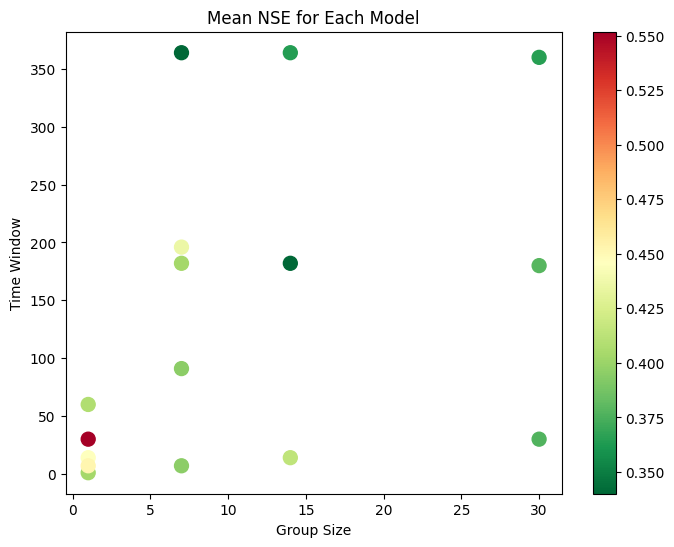

In [258]:
# plot a heatmap of the mean NSE for each model
group_sizes = [group_size for group_size, _, _ in model_info]
time_windows = [group_size * n_groups for group_size, n_groups, _ in model_info]

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(group_sizes, time_windows, c=mean_mse, cmap='RdYlGn_r', s=100)
plt.xlabel("Group Size")
plt.ylabel("Time Window")
plt.title("Mean NSE for Each Model")
plt.colorbar()
plt.show()

# Create a composite model looking at different time windows

# Train an ensemble of the best model

In [ ]:
raise NotImplementedError("Best model not yet determined")

NotImplementedError: Best model not yet determined

In [ ]:
# create datasets and train an ensemble
batch_size = 8
ensemble_size = 10
learning_rate = 0.01

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             mode='min',
                                             verbose=1,
                                             patience=5,
                                             restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.1,
                                                patience=2,
                                                verbose=1,
                                                mode='min')

for i in range(ensemble_size):
    print(f"Training model {i+1}/{ensemble_size}")

    train_dataset = tf.data.Dataset.from_generator(
        gen_train,
        (tf.float16, tf.float16),
        (tf.TensorShape([time_window, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
    ).shuffle(n_train).batch(batch_size)

    val_dataset = tf.data.Dataset.from_generator(
        gen_val,
        (tf.float16, tf.float16),
        (tf.TensorShape([time_window, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
    ).shuffle(n_val).batch(batch_size)

    model = create_model()
    model.fit(
        train_dataset,
        epochs=40,
        validation_data=val_dataset,
        verbose=1,
        callbacks=[early_stopping, reduce_lr],
    )

    # save the model
    model.save(f"models/ensemble_model_{i}.keras")


In [ ]:
# evaluate the ensemble
ensemble = []
for i in range(4):
    model = tf.keras.models.load_model(f"models/ensemble_model_{i}.keras")
    ensemble.append(model)

val_dataset = tf.data.Dataset.from_generator(
    gen_val,
    (tf.float16, tf.float16),
    (tf.TensorShape([time_window, *grid_shape, n_channels]), tf.TensorShape([n_stations]))
).batch(batch_size)

ensemble_predictions = []
for model in ensemble:
    ensemble_predictions.append(model.predict(val_dataset))

ensemble_mean = np.mean(ensemble_predictions, axis=0)

# calculate the RMSE
val_data = np.zeros((n_val, n_stations))
for i, (xx, yy) in enumerate(gen_val()):
    val_data[i] = yy

In [ ]:
# plot the model predictions for the first 20 stations using subplots
n_plot = 20

predictions = ensemble_mean

fig, axs = plt.subplots(n_plot // 2, 2, figsize=(16, n_plot * 2))
for i in range(n_plot):
    mse = np.mean((val_data[:, i] - predictions[:, i]) ** 2)
    station = i
    ax = axs[i // 2, i % 2]
    ax.plot(np.array(ensemble_predictions).T[i], c='k', alpha=0.2)
    ax.plot(val_data[:, station], label='Actual')
    ax.plot(predictions[:, station], label='Predicted')
    ax.set_title(f"Station {station} (MSE: {mse:.3f})")
    ax.legend()
plt.tight_layout()
plt.show()